In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH='/content/drive/My Drive/Face Mask Detection Model/'

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json


api_token = {"username":"","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 96% 380M/398M [00:05<00:00, 61.4MB/s]
100% 398M/398M [00:05<00:00, 74.7MB/s]


In [ ]:
#Unzip
from zipfile import ZipFile
file="face-mask-detection.zip"

with ZipFile(file,'r') as zip:
  zip.extractall()

In [ ]:
import os
import shutil



In [ ]:
with_mask_dir=os.path.join(PATH,'Dataset/with_mask')
without_mask_dir=os.path.join(PATH,'Dataset/without_mask')

total_with_mask=len(os.listdir(with_mask_dir))
total_without_mask=len(os.listdir(without_mask_dir))

print(total_with_mask)
print(total_without_mask)

1915
1918


In [ ]:
#1600*2 - train
#318+315 - test
from random import shuffle
import cv2
import numpy as np

img_size=128

training_data=[]

for img in os.listdir(with_mask_dir)[:1600]:
  label=[0,1]
  path=os.path.join(with_mask_dir,img)
  img=cv2.resize(cv2.imread(path),(img_size,img_size))
  training_data.append([np.array(img),np.array(label)])

shuffle(training_data)
print(len(training_data))



1600


In [ ]:
for img in os.listdir(without_mask_dir)[:1600]:
  label=[1,0]
  path=os.path.join(without_mask_dir,img)
  img=cv2.resize(cv2.imread(path),(img_size,img_size))
  training_data.append([np.array(img),np.array(label)])

shuffle(training_data)
print(len(training_data))

3200


(128, 128, 3)
RGB


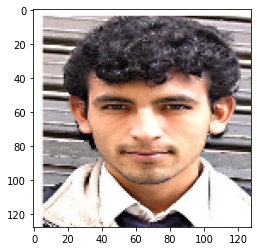

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
training_data[0][0]=cv2.cvtColor(training_data[0][0],cv2.COLOR_BGR2RGB)
#data=cv2.cvtColor(training_data[0][0],cv2.COLOR_BGR2RGB)
data=training_data[1][0]
print(data.shape)
img=Image.fromarray(data)
print(img.mode)
plt.imshow(data)

In [ ]:
for data in training_data:
  data[0]=cv2.cvtColor(data[0],cv2.COLOR_BGR2RGB)

(128, 128, 3)
RGB


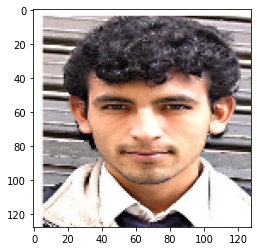

In [ ]:
data=training_data[1][0]
print(data.shape)
img=Image.fromarray(data)
print(img.mode)
plt.imshow(data)

In [ ]:
shuffle(training_data)
np.save('training_data.npy',training_data)

In [ ]:
src='/content/training_data.npy'
dest='/content/drive/My Drive/Face Mask Detection Model/Train'

shutil.move(src,dest)

'/content/drive/My Drive/Face Mask Detection Model/Train/training_data.npy'

In [ ]:
training_data=np.load('/content/drive/My Drive/Face Mask Detection Model/Train/training_data.npy', allow_pickle=True)

In [ ]:
print(training_data[0][1])

[0 1]


In [ ]:
testing_data=[]

for img in os.listdir(with_mask_dir)[1600:]:
  label=[0,1]
  path=os.path.join(with_mask_dir,img)
  img=cv2.resize(cv2.imread(path),(img_size,img_size))
  testing_data.append([np.array(img),np.array(label)])

shuffle(testing_data)
print(len(testing_data))


315


In [ ]:
for img in os.listdir(without_mask_dir)[1600:]:
  label=[1,0]
  path=os.path.join(without_mask_dir,img)
  img=cv2.resize(cv2.imread(path),(img_size,img_size))
  testing_data.append([np.array(img),np.array(label)])

shuffle(testing_data)
print(len(testing_data))

633


In [ ]:
for data in testing_data:
  data[0]=cv2.cvtColor(data[0],cv2.COLOR_BGR2RGB)

In [ ]:
shuffle(testing_data)
np.save('testing_data.npy',testing_data)



In [ ]:
dest='/content/drive/My Drive/Face Mask Detection Model/Test'
src='/content/testing_data.npy'

shutil.move(src,dest)

'/content/drive/My Drive/Face Mask Detection Model/Test/testing_data.npy'

In [ ]:
class_names=['without mask','with mask']
def show_random_examples(data_set):
  data=data_set
  
  data=data[1000:1010]  

  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(data[i][0])
    plt.xticks([])
    plt.yticks([])
    #col = 'green' if np.argmax(data[i][1]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(data[i][1])], color='green')

plt.show()

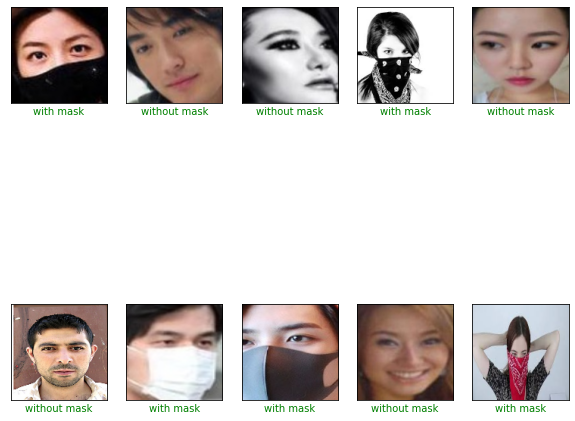

In [ ]:
show_random_examples(training_data)